#                                                            
                                            KINGSLEY JOLLY JACKSON 
                                         Data Science Job Salaries EDA

In [1]:
#Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv("C:/Users/CDL-KINGSLEY/Desktop/Data Science salary/ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
#Check for Duplicate

print (df.duplicated().sum())

0


In [7]:
df.shape

(607, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

experience_level
['MI' 'SE' 'EN' 'EX']
employment_type
['FT' 'CT' 'PT' 'FL']
job_title
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


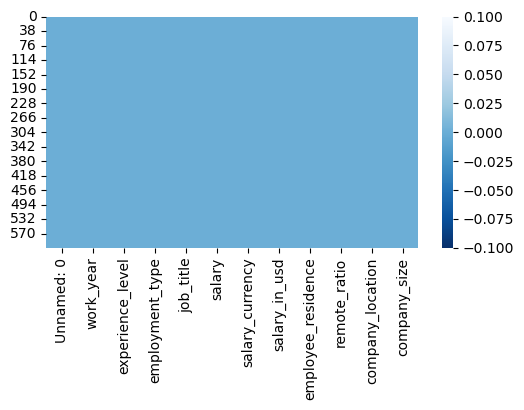

In [10]:
#Checking missing values
print (df.isnull().sum())

#Visualizing the missing data


plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

In [11]:
#Investigate features with one value
for columns in df.columns:
    print (columns,df[columns].nunique())

Unnamed: 0 607
work_year 3
experience_level 4
employment_type 4
job_title 50
salary 272
salary_currency 17
salary_in_usd 369
employee_residence 57
remote_ratio 3
company_location 50
company_size 3


In [12]:
cat_features = [col for col in df.select_dtypes(include='object').columns if col != 'deposit']
cat_features

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [13]:
for col in cat_features:
    print ('The col is {} and number of categories are {}'.format(col,len (df[col].unique())) )

The col is experience_level and number of categories are 4
The col is employment_type and number of categories are 4
The col is job_title and number of categories are 50
The col is salary_currency and number of categories are 17
The col is employee_residence and number of categories are 57
The col is company_location and number of categories are 50
The col is company_size and number of categories are 3


In [14]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

## Data Cleaning

In [15]:
#drop "unnamed" because it has no relevance in the dataset
df.drop (columns='Unnamed: 0', axis='columns',inplace=True)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Univatriate Analysis

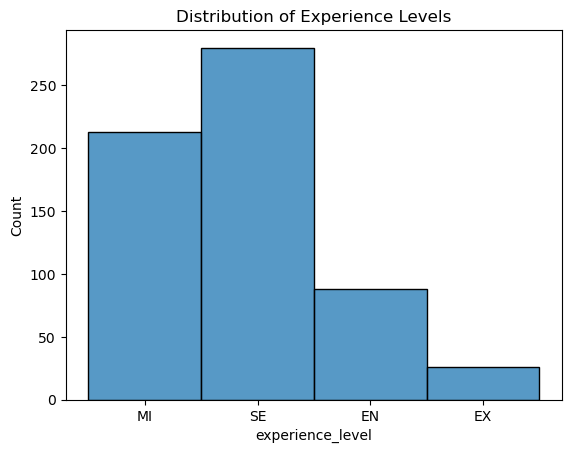

In [16]:
#Univatriate distribution of Experience level
sns.histplot(x='experience_level', data=df)
plt.title('Distribution of Experience Levels')
plt.show();

##### Observation:
* The SE (Senior-level / Expert) contribute the highest number of the experience level, followed by MI (Mid-level / Intermediate)
* EN (Entry-level / Junior) contributed small number while EX (Executive-level / Director) being the highest experienced level have few number of persons attain the ranks.

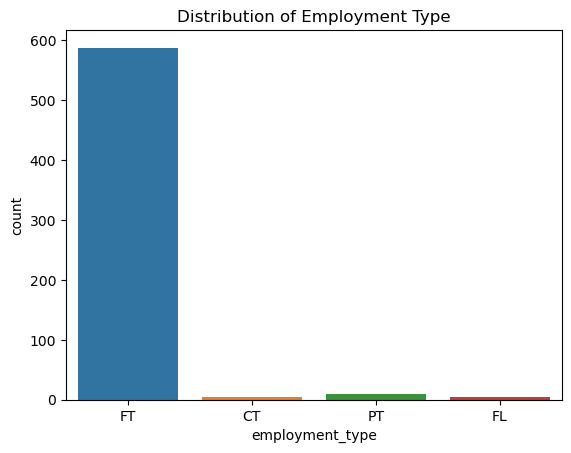

In [17]:
#Univatriate distribution of the employment_type feature
plt.title('Distribution of Employment Type')
sns.countplot(x='employment_type',data = df);

##### Observation:
* The representation from the dataset shows that full time staff have the hihest population

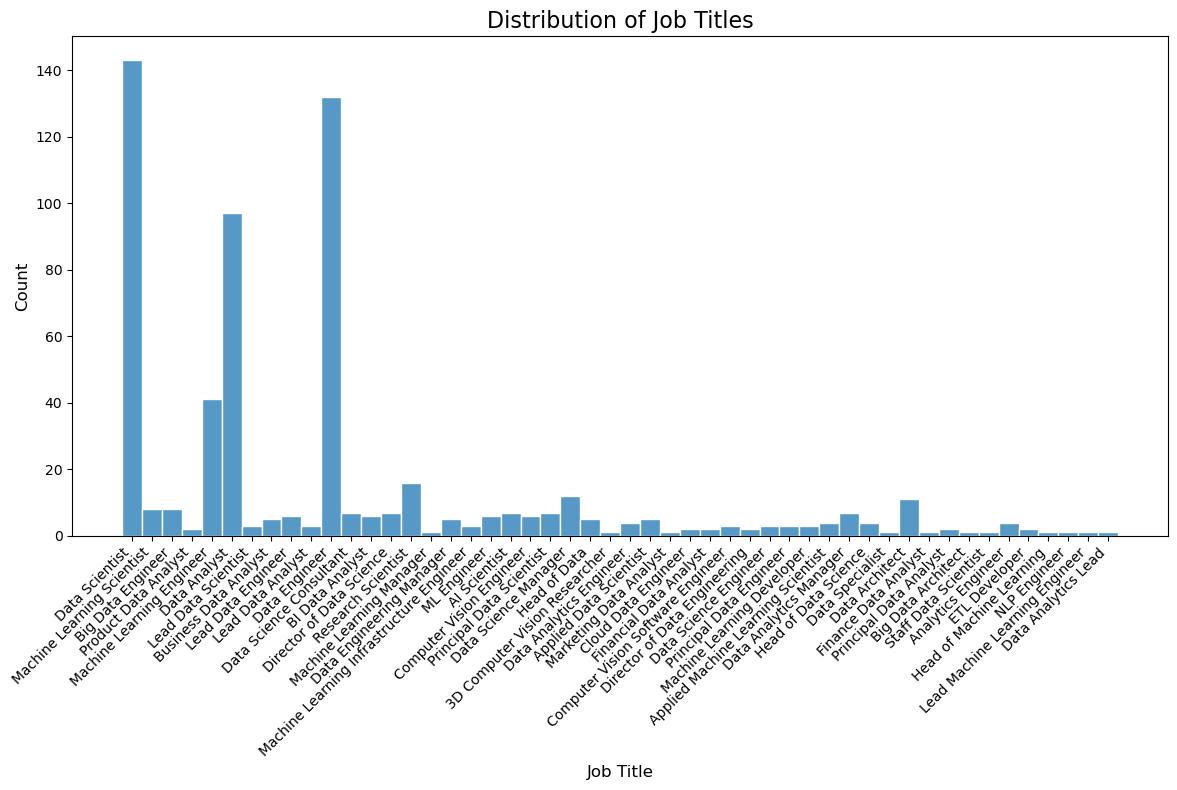

In [18]:
#Univatriate distribution of job_title feature

plt.figure(figsize=(12, 8))  

sns.histplot(x='job_title', data=df, bins=20, edgecolor='white')  
plt.xlabel('Job Title', fontsize=12) 
plt.ylabel('Count', fontsize=12)  
plt.title('Distribution of Job Titles', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()  
plt.show()  

##### Observation:

* Data scientist contribute the largest work force of the job title, followed by data engineers and data analyst

In [19]:
#plt.figure(figsize=(12, 8))

#sns.histplot(x='job_title', data=df, bins=20, edgecolor='white')
#plt.xlabel('Job Title', fontsize=12)
#plt.ylabel('Count', fontsize=12)
#plt.title('Distribution of Job Titles', fontsize=16)
#plt.xticks(rotation=45, ha='right', fontsize=10)
#plt.tight_layout()

# Adding the summary
#summary = df['job_title'].value_counts().reset_index()
#summary.columns = ['Job Title', 'Count']
#for i, row in summary.iterrows():
    #plt.text(row['Job Title'], row['Count'], f"{row['Count']}", ha='center', va='bottom')

#plt.show()

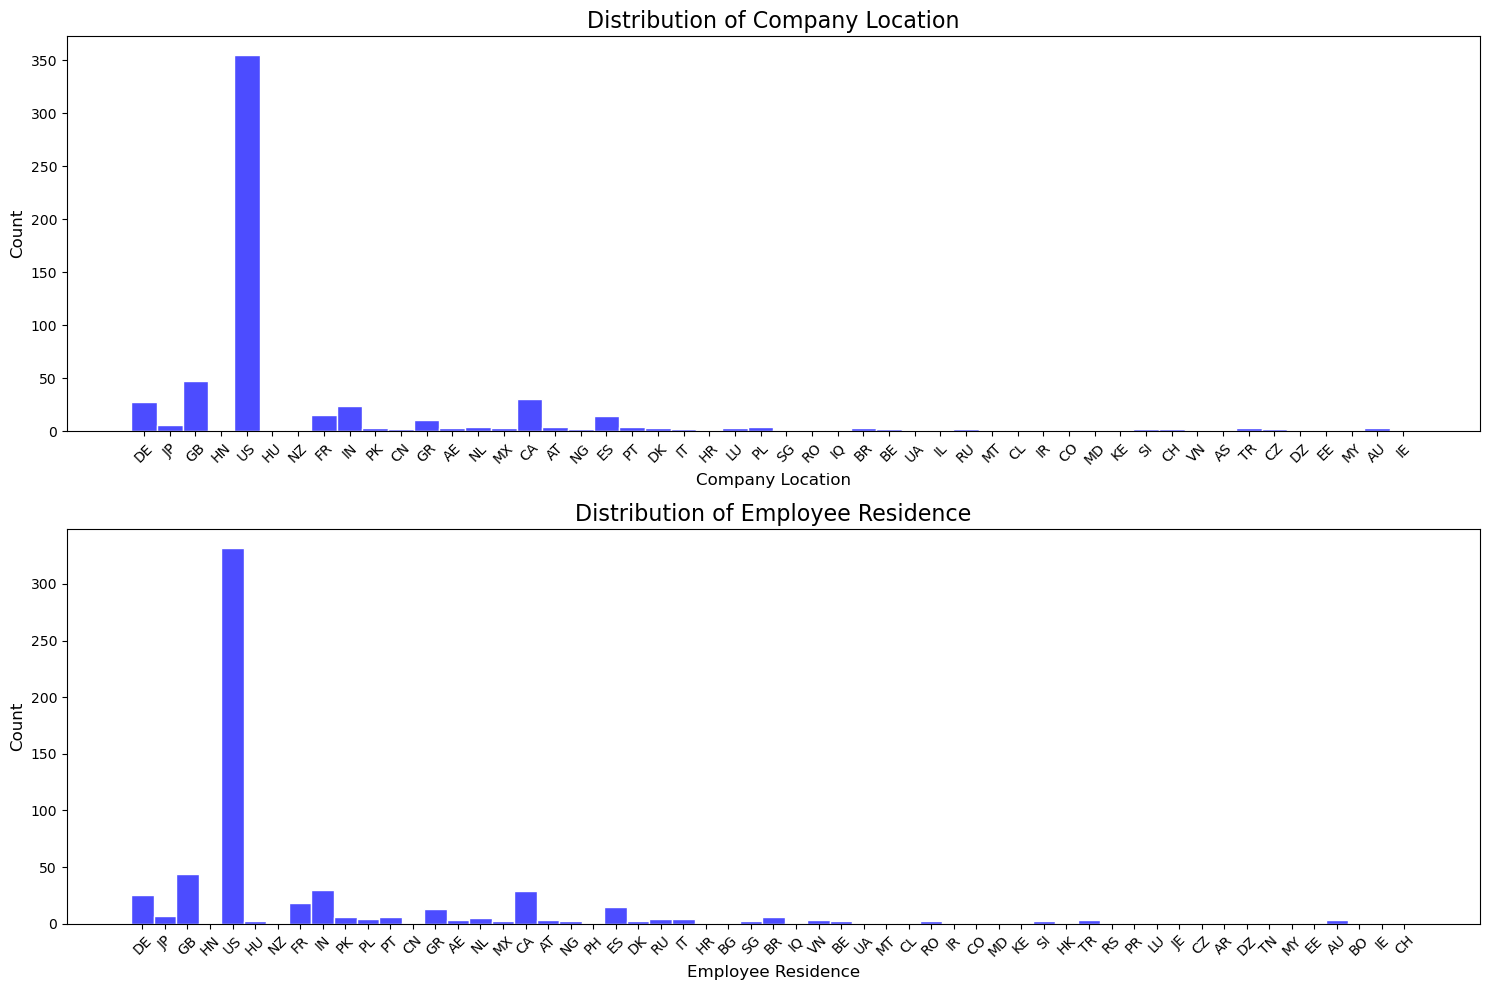

In [20]:
#Univatriate distribution for CompanyLocation and  Employee Residence feature

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plotting the distribution of Company Location
sns.histplot(x='company_location', data=df, color='blue', edgecolor='white', alpha=0.7, ax=axs[0])
axs[0].set_title('Distribution of Company Location', fontsize=16)
axs[0].set_xlabel('Company Location', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plotting the distribution of Employee Residence
sns.histplot(x='employee_residence', data=df, color='blue', edgecolor='white', alpha=0.7, ax=axs[1])
axs[1].set_title('Distribution of Employee Residence', fontsize=16)
axs[1].set_xlabel('Employee Residence', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

##### Observation:
* US share the highest proportion of the company location, followed by Great Britain and Canada
* Also the employee residence data shows number of people reside in US and Great Britain

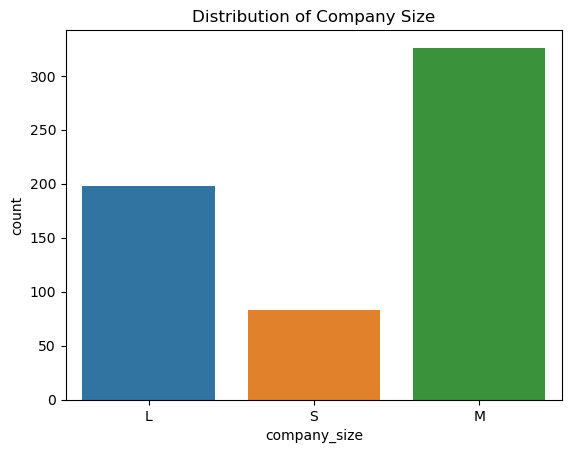

In [21]:
#Univatriate distribution for Company size
sns.countplot(x='company_size', data=df)
plt.title('Distribution of Company Size')
plt.show();

##### Observation:
* Most the company employees populations, medium contribute about 300 plus and the large size company contribute about 200

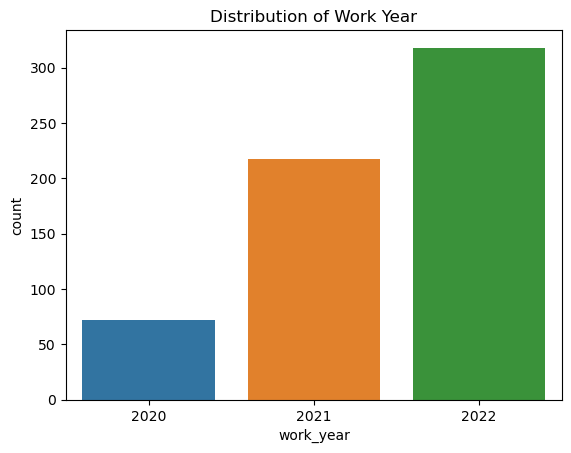

In [22]:
#Univatriate distribution of work year

plt.title('Distribution of Work Year')
sns.countplot(x='work_year',data = df);

##### Observation:

* Year 2022 contribute the highest year salary were paid. 

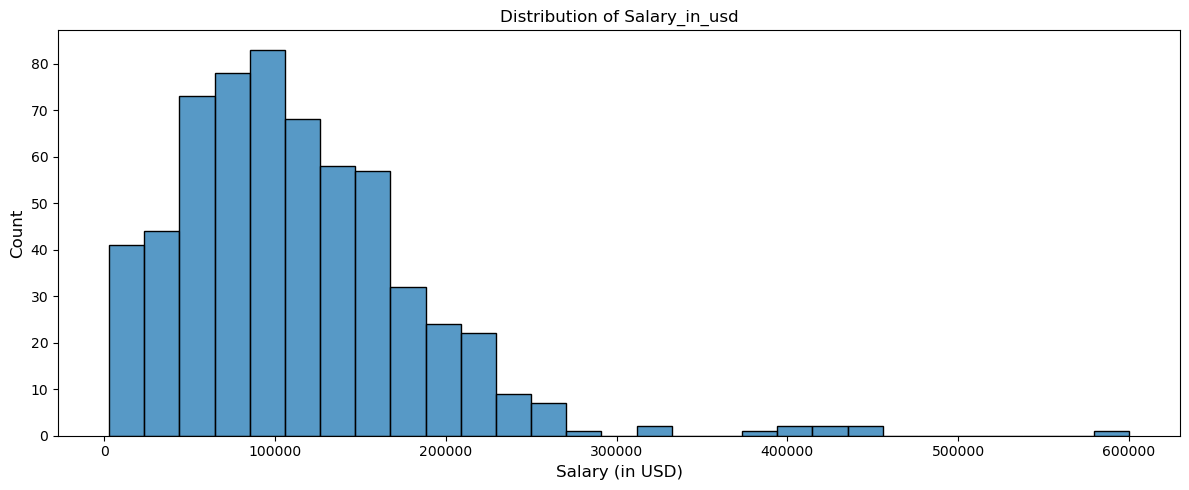

In [61]:
#Univatriate distribution of salary_in_usd

plt.figure(figsize=(12, 5))
plt.title('Distribution of Salary_in_usd')
sns.histplot(x='salary_in_usd', data=df)
plt.xlabel('Salary (in USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

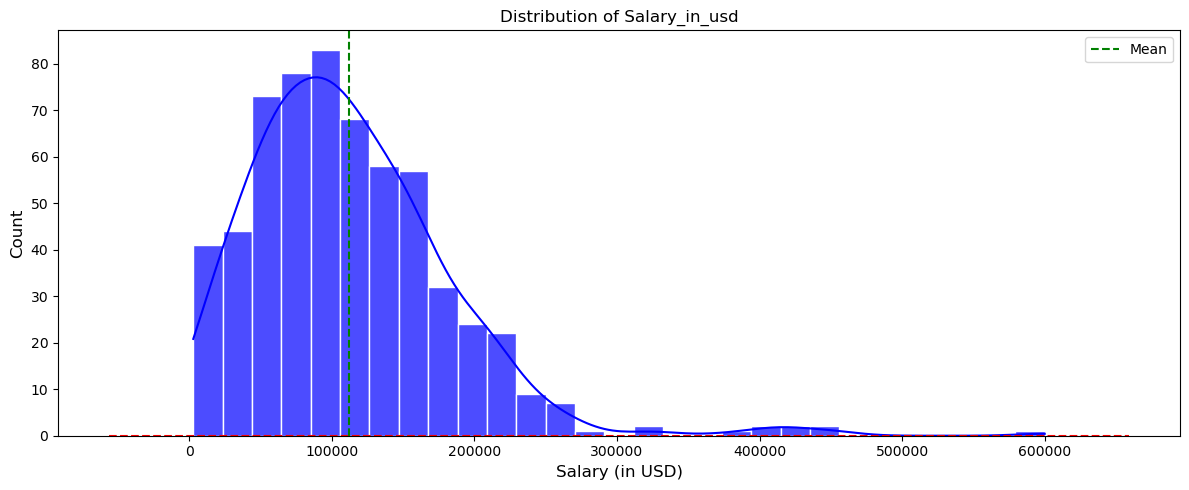

In [60]:
#Univatriate distribution of salary_in_usd

plt.figure(figsize=(12, 5))
plt.title('Distribution of Salary_in_usd')

sns.histplot(x='salary_in_usd', data=df, kde=True, color='blue', edgecolor='white', alpha=0.7)
sns.kdeplot(x='salary_in_usd', data=df, color='red', linestyle='--')

plt.xlabel('Salary (in USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Calculate skewness
skewness = df['salary_in_usd'].skew()

# Add vertical line for mean or median
if skewness < 0:
    plt.axvline(x=df['salary_in_usd'].median(), color='green', linestyle='--', label='Median')
else:
    plt.axvline(x=df['salary_in_usd'].mean(), color='green', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

##### Observation:

* The salary rate is skewed to the right which shows a positive trend as you climb the ladder

In [39]:
#df.columns

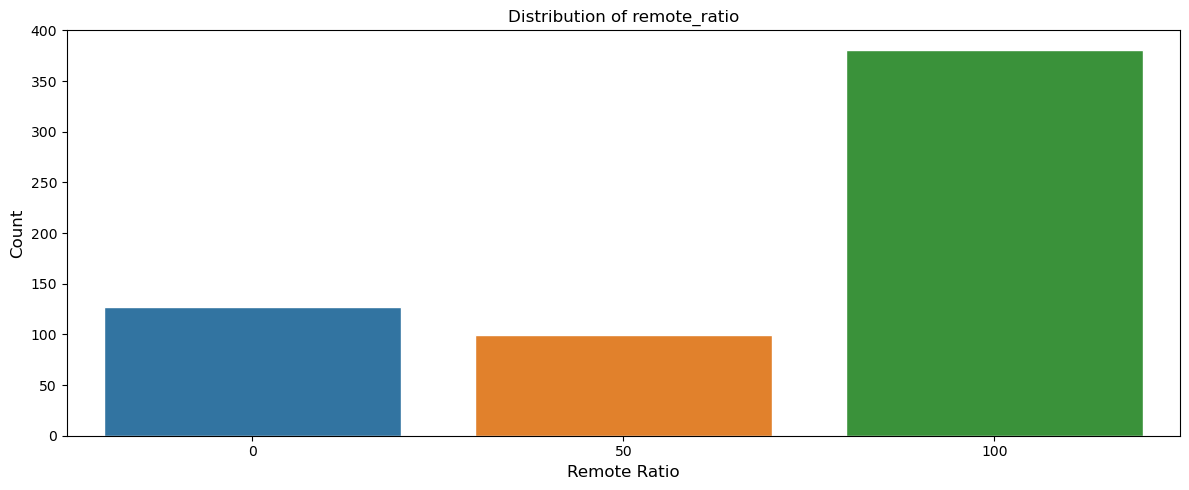

In [26]:
#Univatriate distribution of remote_ratio
plt.figure(figsize=(12, 5))
plt.title('Distribution of remote_ratio')
sns.countplot(x='remote_ratio', data=df,edgecolor='white')
plt.xlabel('Remote Ratio', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

##### Observation:

* From the dataset 100% of the employees work remotely

## Work Year Analysis

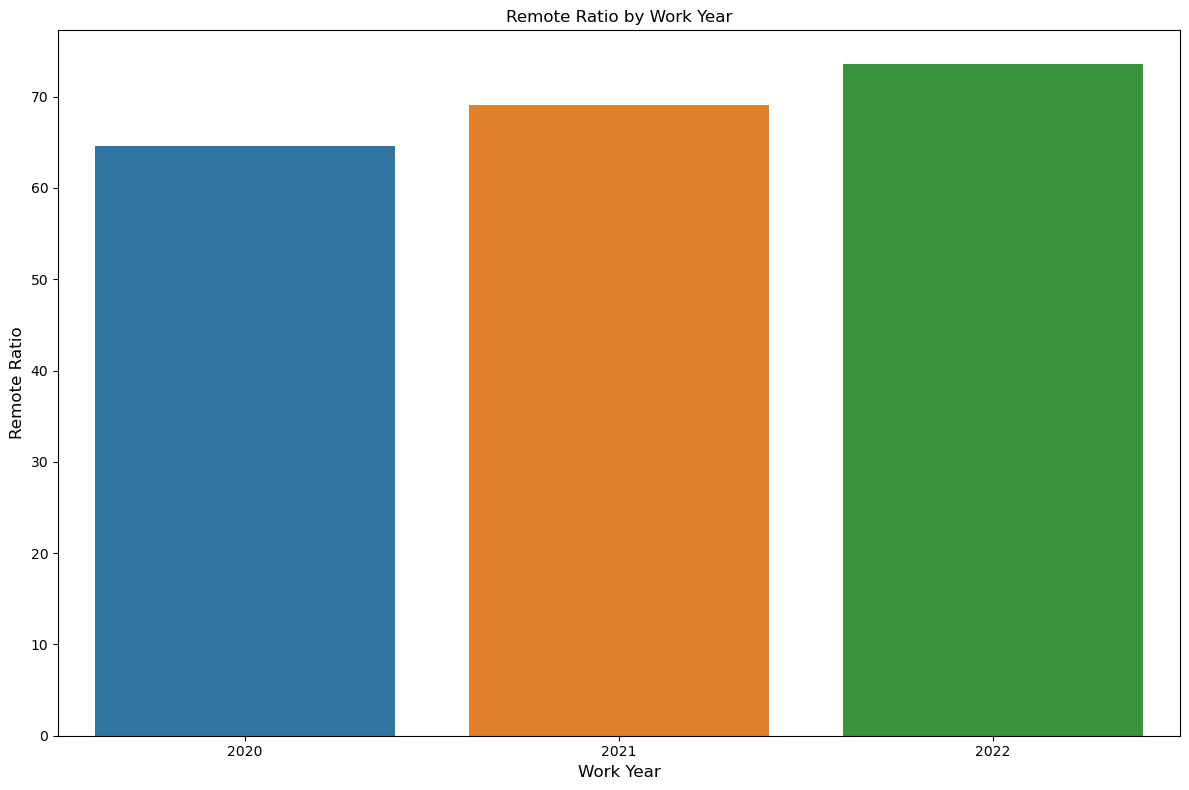

In [27]:

plt.figure(figsize=(12, 8))
plt.title('Remote Ratio by Work Year')

sns.barplot(x='work_year', y='remote_ratio', data=df, ci=None)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Remote Ratio', fontsize=12)

plt.tight_layout()
plt.show()

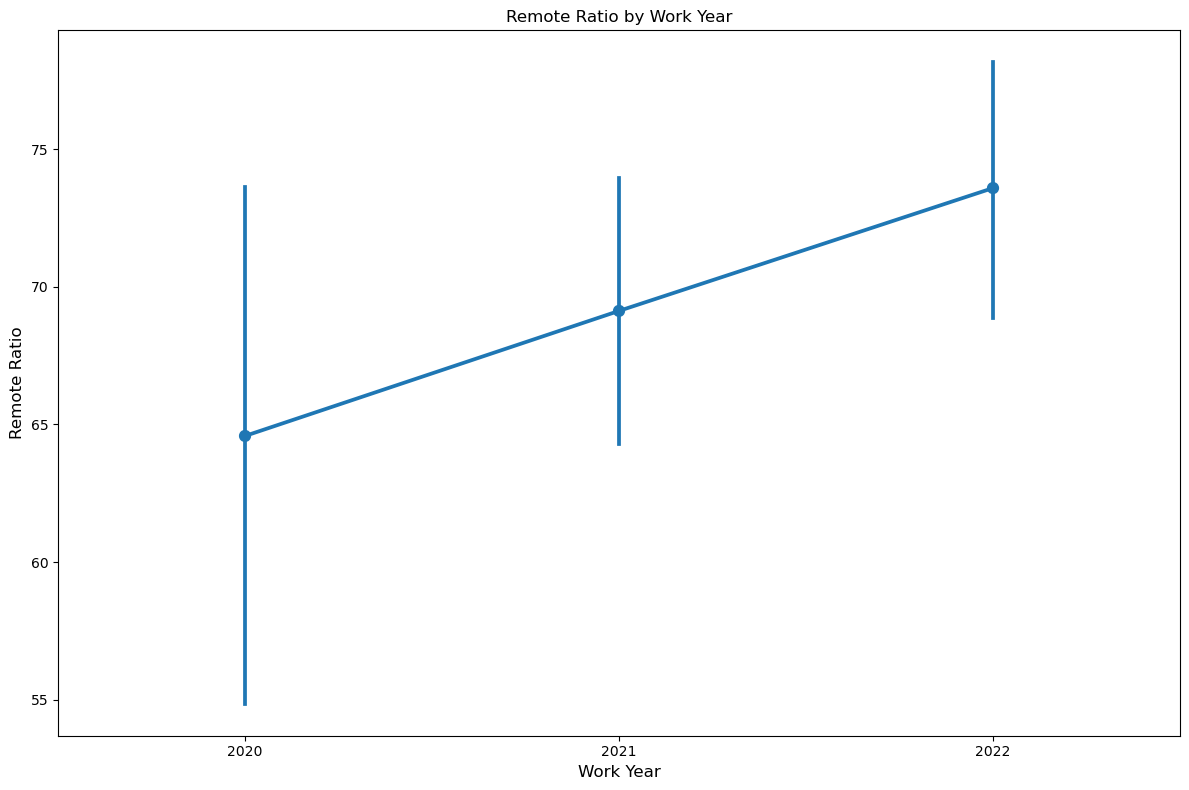

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Remote Ratio by Work Year')

sns.pointplot(x='work_year', y='remote_ratio', data=df)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Remote Ratio', fontsize=12)

plt.tight_layout()
plt.show()

##### Observation:

* Year 2022 contribute the highest remote working ratio

## Experience Level Analysis

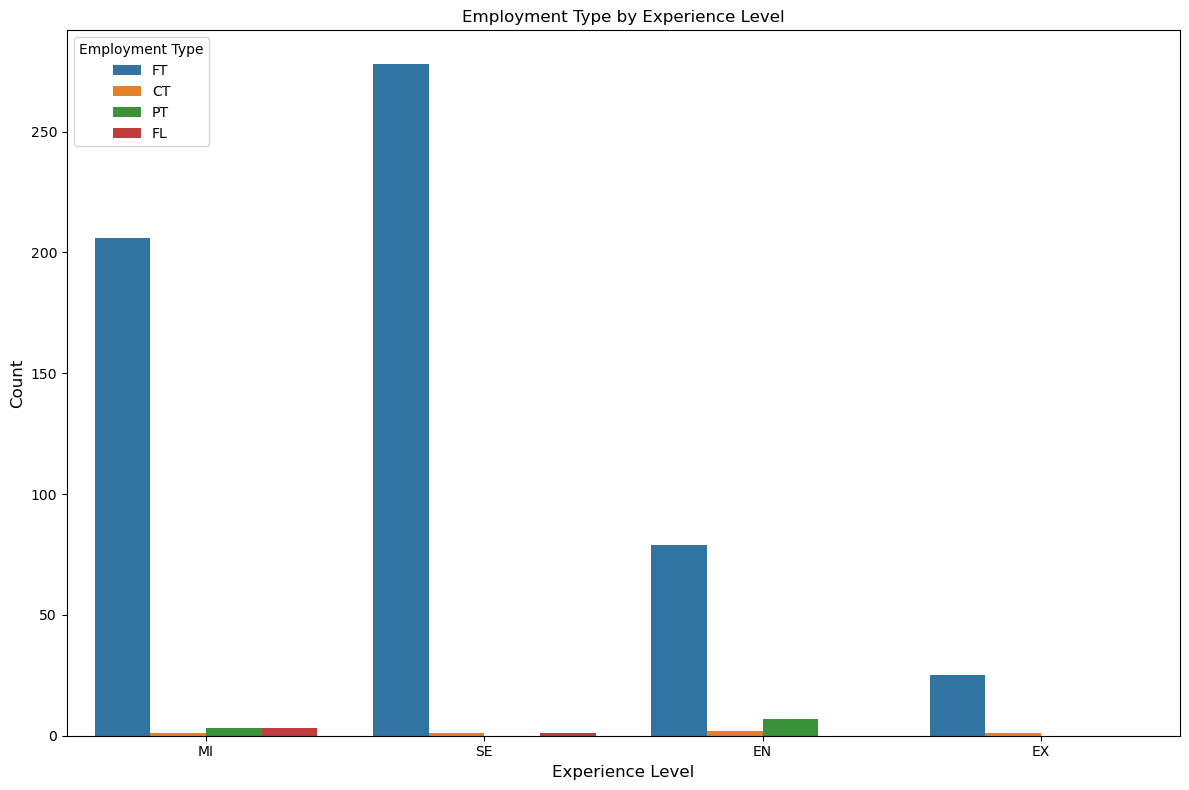

In [40]:
#Employment type by experience level

plt.figure(figsize=(12, 8))
plt.title('Employment Type by Experience Level')

sns.countplot(x='experience_level', hue='employment_type', data=df)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Employment Type')

plt.tight_layout()
plt.show()


##### Observation:

* Across all the data full time employees contribute the highest in all the experience level

## Top 3 Job Title by Experience Level

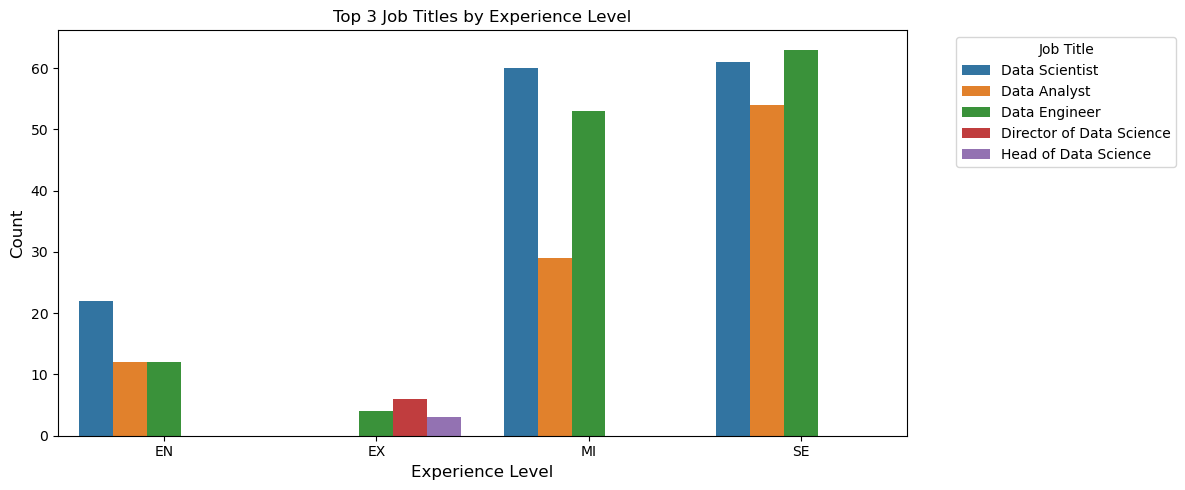

In [52]:
#top 3 job title by experience

plt.figure(figsize=(12, 5))
plt.title('Top 3 Job Titles by Experience Level')

ax = sns.barplot(x='experience_level', y='count', hue='job_title', data=top_job_titles)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

legend = ax.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64


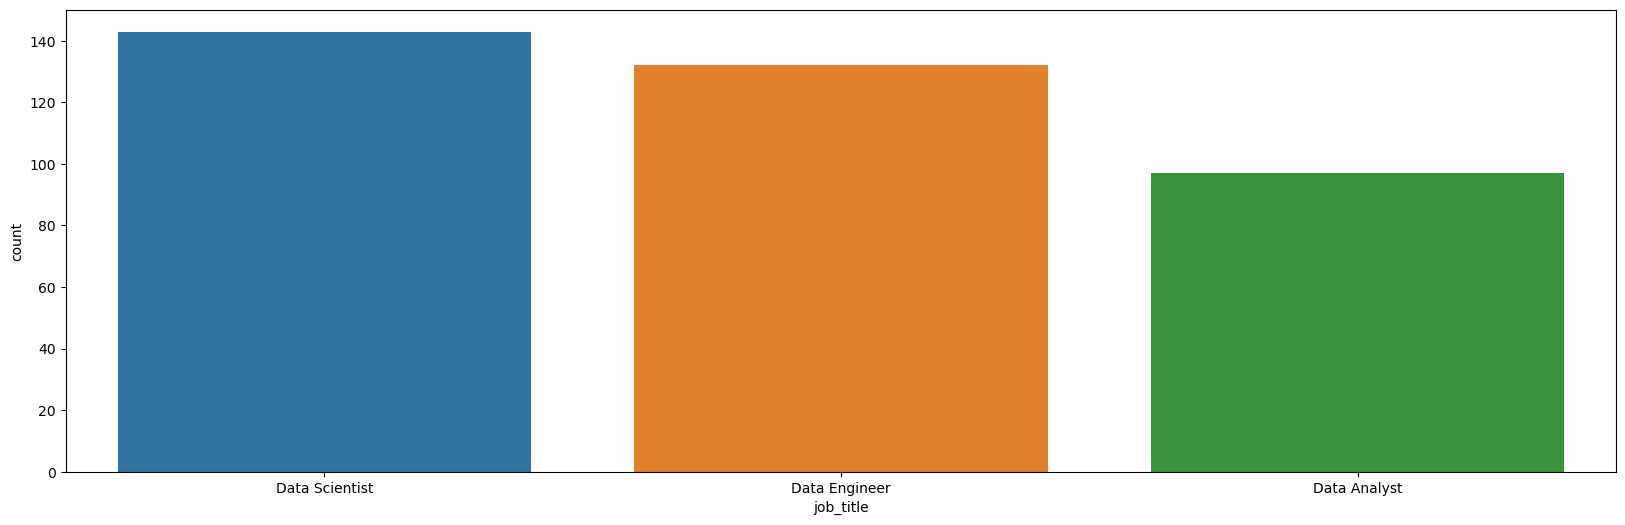

In [53]:
plt.figure(figsize =(20,6))
topthree =df["job_title"].value_counts().head(3)
sns.countplot(x="job_title",data = df, order = topthree.index);
print (topthree);

##### Observation:

* The top 3 job title is Data scientist, Data engineers and Data analyst. While the experience level majorly fall
within SE and MI in the dataset
* The SE job title distibution according to ranking in the dataset is Data engineers, Data scientist and Data analyst respectively.
* The SE job title distibution according to ranking in the dataset is Data scientist, Data engineers and Data analyst.


## Company Size by Experience Level

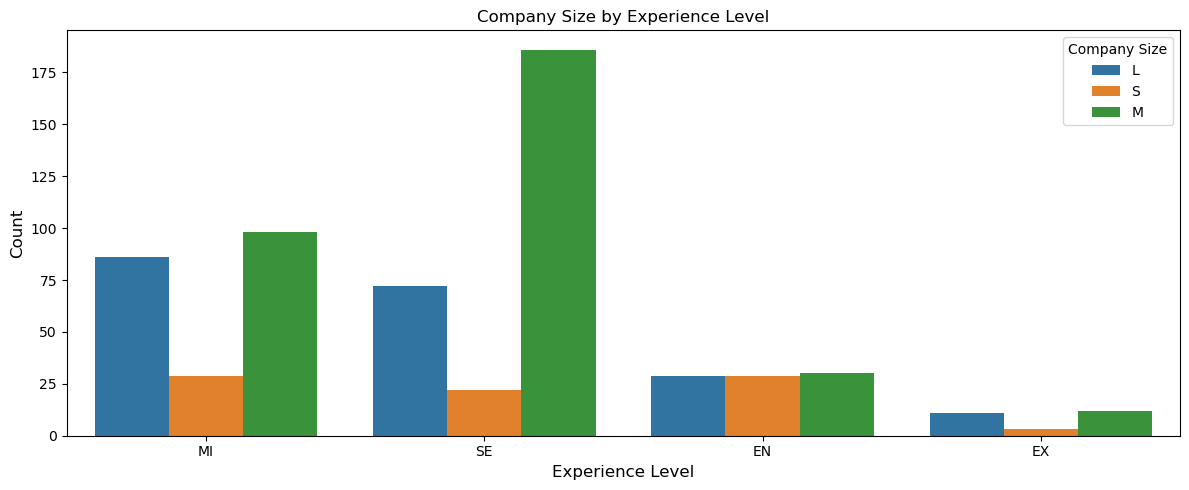

In [49]:
plt.figure(figsize=(12, 5))
sns.countplot(x='experience_level', hue='company_size', data=df)

plt.title('Company Size by Experience Level')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

##### Observation:

* The Medium size company have the highest number employees with SE experience level, followed by MI 

## Company Location by Experience Level

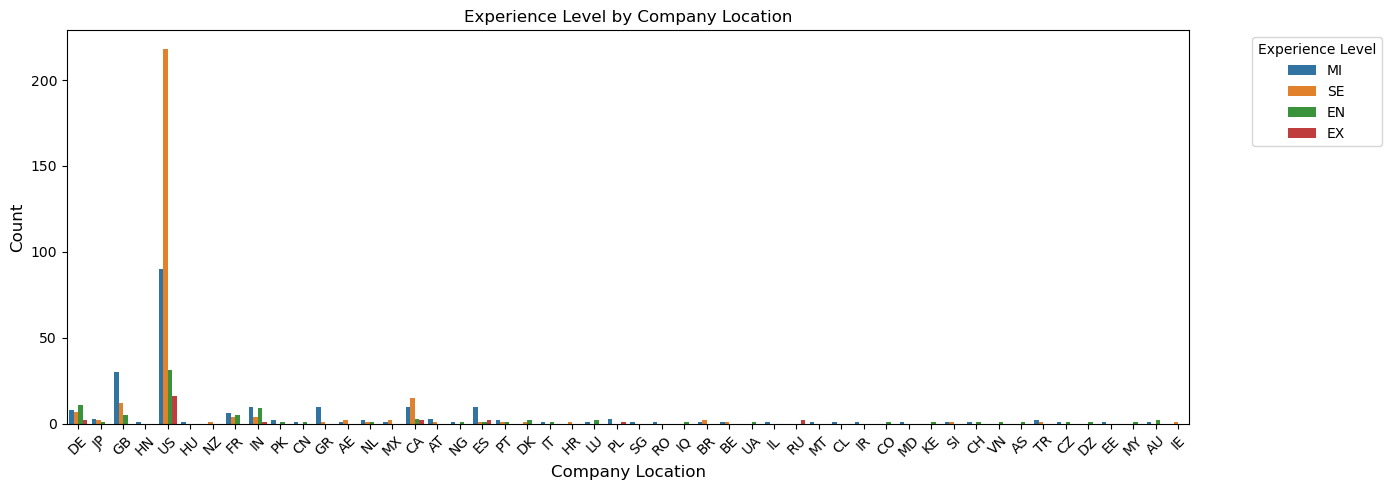

In [48]:
plt.figure(figsize=(14, 5))
sns.countplot(x='company_location', hue='experience_level', data=df)

plt.title('Experience Level by Company Location')
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Count', fontsize=12)

legend = plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Observation:

* The US has the highest number of SE and MI employees

## Salary by work year

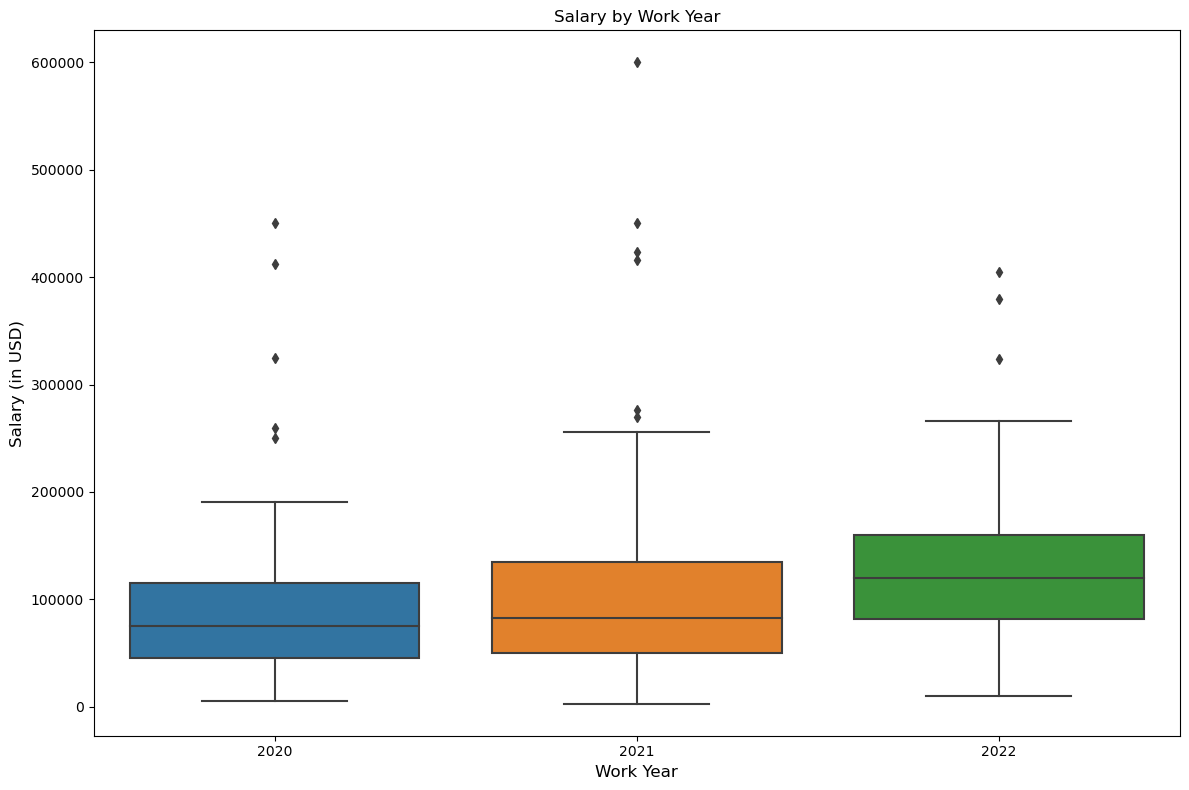

In [54]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)

plt.title('Salary by Work Year')
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)

plt.tight_layout()
plt.show()

##### Observation:

* The year 2021 shows a significant outliers in salary and 2022 steady increase in salary

## Salary by Experience Level

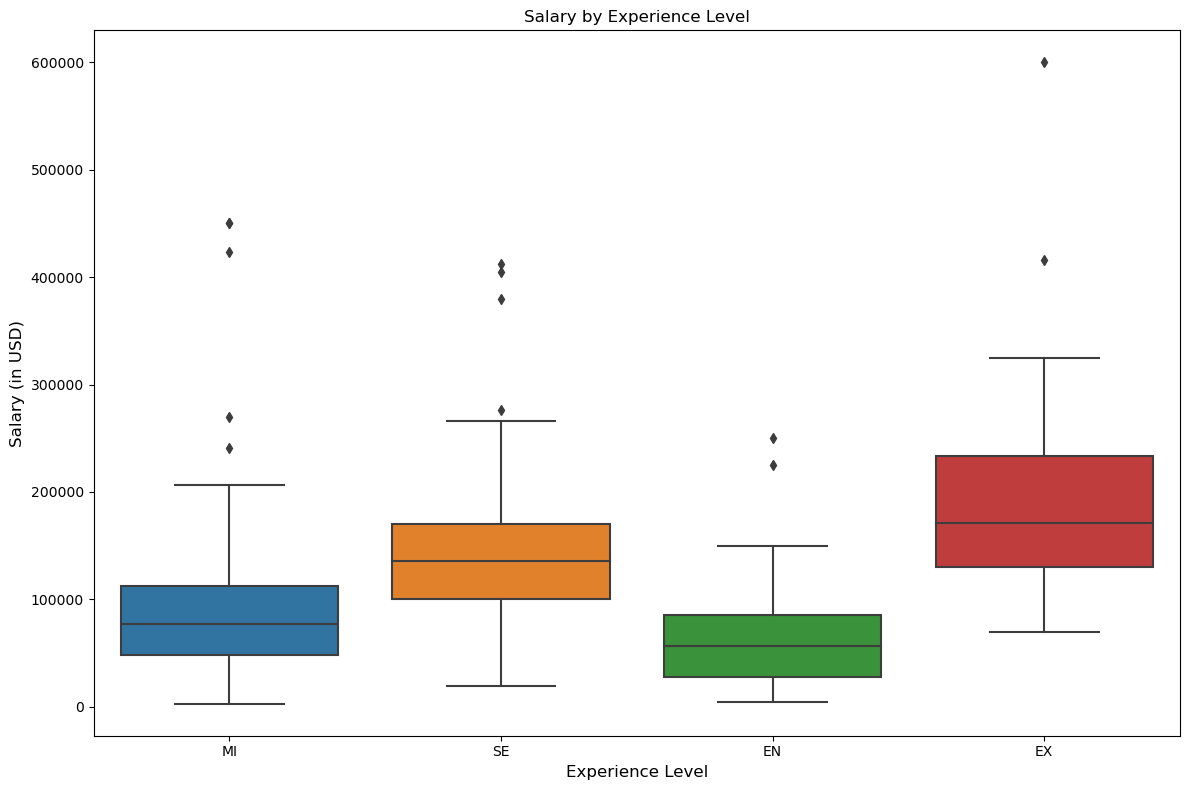

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)

plt.title('Salary by Experience Level')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)

plt.tight_layout()
plt.show()

##### Observation:

* The Executives earn more salary followed by Senior level experts

## Salary by Company Size

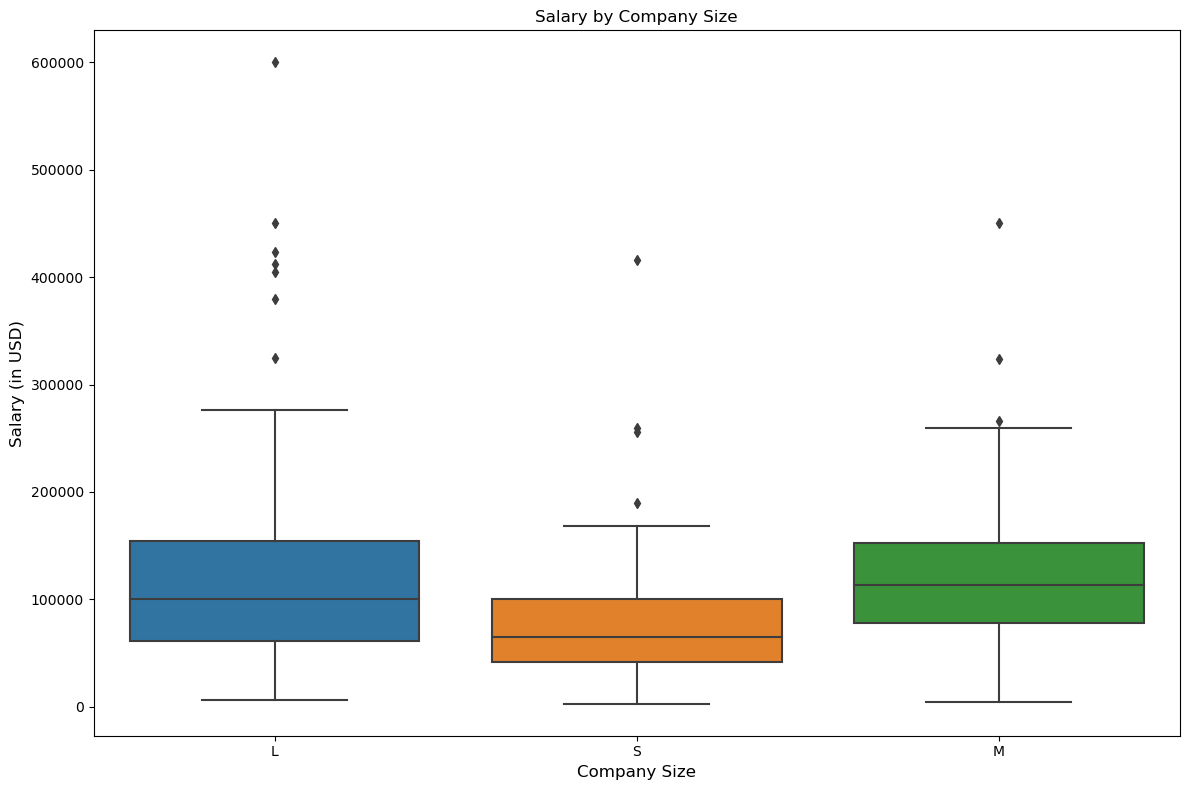

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)

plt.title('Salary by Company Size')
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)

plt.tight_layout()
plt.show()

##### Observation:

* The dataset shows that employees working in large company earns more salary followed by medium scale companies

## Highest salaries by job title

In [57]:
#highest_salaries = df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)
#print(highest_salaries)

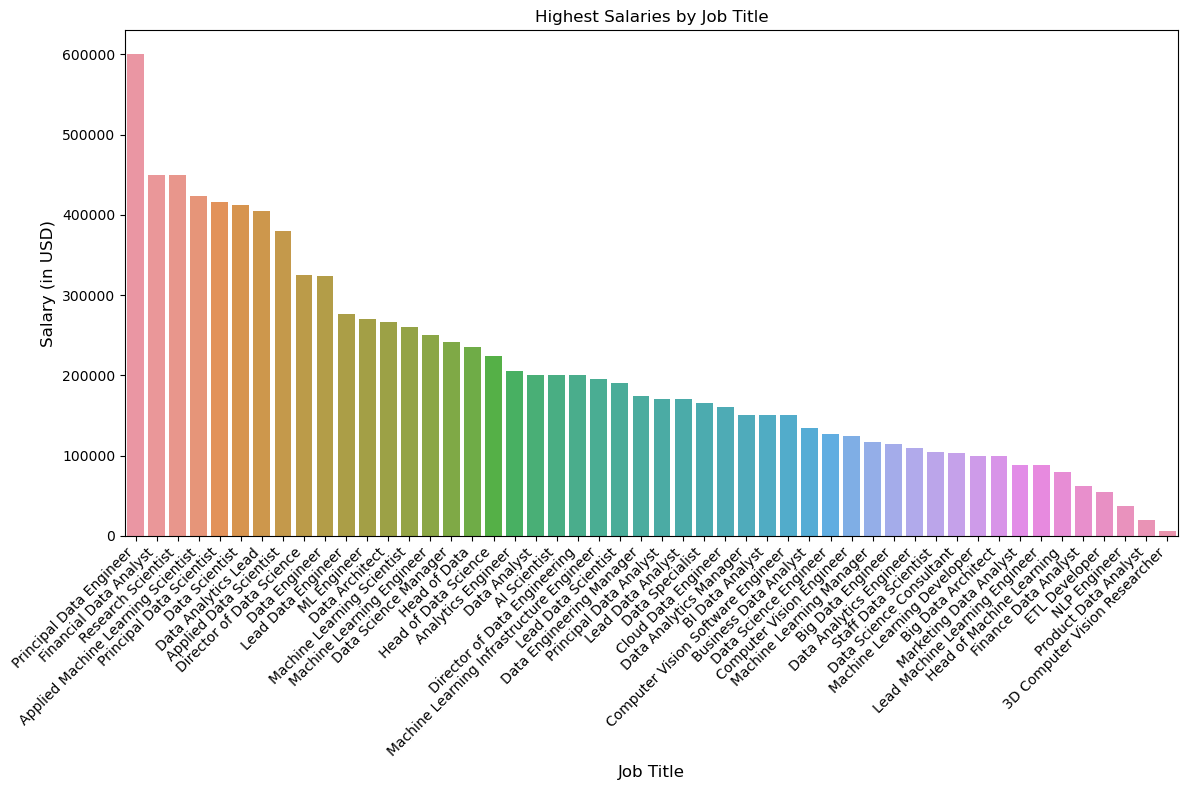

In [58]:
plt.figure(figsize=(12, 8))
highest_salaries = df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)
sns.barplot(x=highest_salaries.index, y=highest_salaries.values)

plt.title('Highest Salaries by Job Title')
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation:

* Principal data engineer are the highest paid job title in the dataset followed by Financial data analyst through to 3D computer vision reseacher as the least salary earners.

## Average Salary by Company Location

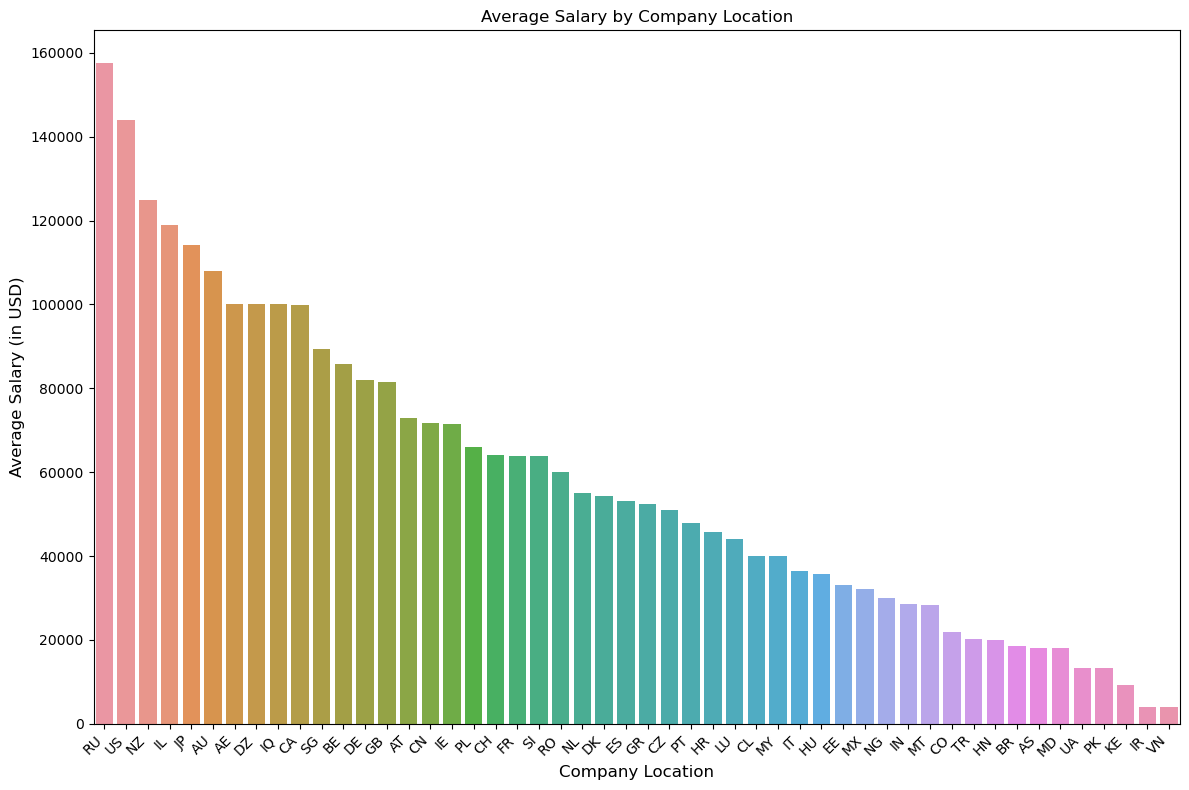

In [59]:

plt.figure(figsize=(12, 8))
average_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=average_salary.index, y=average_salary.values)

plt.title('Average Salary by Company Location')
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Average Salary (in USD)', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation:

* RU has the highest company location avarage salary contribution followed by US, NZ through to VN